In [2]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


create predictors

In [9]:
X = 2 * np.random.randn(100, 1)

create targets based on predictors with random noise

using the following. where E is normally distributed error

$$y=4+3x+E$$ 

In [10]:
y = 4 + 3 * X + np.random.randn(100,1)

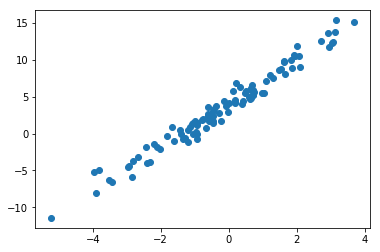

In [11]:
plt.scatter(X,y)


We solve with the normal equation....

$$\theta=(X^TX)^-1 X^Ty$$

np.linalg.inv computes the inverse -$$^-1$$

add the constant to X array by concat of an array of ones

In [12]:
X_b = np.c_[np.ones((100,1)), X]

In [13]:
np.linalg.inv(X_b.T.dot(X_b))

array([[0.01013207, 0.00063591],
       [0.00063591, 0.00306177]])

then we can use .dot for the rest

In [14]:
X_b.T.dot(y)

array([[339.92254827],
       [885.83255781]])

now put together

In [15]:
coef = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
coef

array([[4.00742783],
       [2.92837142]])

seeing our equation is $$y=4+3x+E$$ and estimate of $$y=4.007+2.928x+E$$ is not bad 

lets plot our model

In [17]:
def linear_model(m,c,minimum, maximum):
    
    return [m*x+c for x in range(minimum,maximum)]

In [18]:
X_pred = linear_model(coef[1][0], coef[0][0], -6, 5)

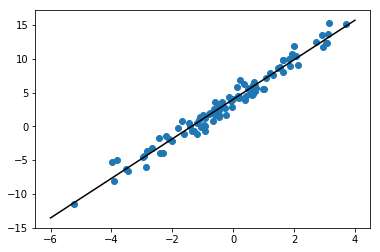

In [19]:
plt.scatter(X,y)
plt.plot([x for x in range(-6,5)], X_pred, "k")

now with sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
mdl = LinearRegression()

In [22]:
mdl.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print(f"intercept: {mdl.intercept_}\ncoefficents:{mdl.coef_}")

intercept: [4.00742783]
coefficents:[[2.92837142]]


shockingly these are the same

this is based on scipy/numpy implementation of linear least squares, so we can call that directly

In [24]:
theta_bst, resid, rank, s = np.linalg.lstsq(X_b, y, rcond =1e-6)

print(f"theat: {theta_bst}\nresiduals:{resid}\nrank: {rank}\ns: {s}")

theat: [[4.00742783]
 [2.92837142]]
residuals:[88.36324823]
rank: 2
s: [18.24213939  9.90691012]


## Gradient descent

The algorithm is as follows

$$\theta_{next} = \theta - \eta\Delta_\theta$$  $$MSE(\theta)$$

Where

$$\eta = learning rate$$

so to implement...

In [25]:
a = np.random.randn(2,1)
b= np.random.randn(2,1)

In [26]:
c = np.hstack((a,b))

In [27]:
c

array([[0.35778736, 1.08305124],
       [0.56078453, 1.05380205]])

In [28]:
np.hstack((c,b))

array([[0.35778736, 1.08305124, 1.08305124],
       [0.56078453, 1.05380205, 1.05380205]])

In [29]:
c[0]

array([0.35778736, 1.08305124])

In [30]:
def gradient_desc(X_b,
                  y,
                  eta, 
                  n_iter = 1000,
                  verbose = False,
                  figures = False
                 ):
    # number of observations
    n_obs = X_b.shape[0] 
    #initial theta guess
    
    theta = np.random.randn(2,1)
    thetas = theta
    
    if verbose:
        print(f"Initial guess:{theta}")
        
    for i in range(n_iter):
        
        grad =2/n_obs * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * grad
        thetas = np.hstack((thetas, theta))
        if verbose:
            print(f"step {i} theta:{theta}\ngradient{grad}")
    
    if verbose:
        plt.title(f"theta values - best = {theta[0]}, {theta[1]}")
        plt.xlabel("theta[0]")
        plt.ylabel("theta[1]")
        plt.plot(all_thetas[0],all_thetas[1], "b-o")
    return theta, thetas

Initial guess:[[-1.37766937]
 [-0.93782504]]
step 0 theta:[[-0.46124634]
 [ 1.39730846]]
gradient[[ -9.16423024]
 [-23.35133496]]
step 1 theta:[[0.36889027]
 [2.22501238]]
gradient[[-8.30136612]
 [-8.27703921]]
step 2 theta:[[1.06738123]
 [2.53938729]]
gradient[[-6.98490957]
 [-3.14374909]]
step 3 theta:[[1.63923269]
 [2.67470906]]
gradient[[-5.71851462]
 [-1.35321778]]
step 4 theta:[[2.10233494]
 [2.74422271]]
gradient[[-4.63102248]
 [-0.69513644]]
step 5 theta:[[2.47570423]
 [2.78696571]]
gradient[[-3.73369298]
 [-0.42743006]]
step 6 theta:[[2.77617516]
 [2.81692871]]
gradient[[-3.00470923]
 [-0.29963   ]]
step 7 theta:[[3.01779652]
 [2.83954199]]
gradient[[-2.4162136 ]
 [-0.22613281]]
step 8 theta:[[3.21203293]
 [2.8572254 ]]
gradient[[-1.94236412]
 [-0.17683408]]
step 9 theta:[[3.3681566 ]
 [2.87127344]]
gradient[[-1.56123674]
 [-0.14048042]]
step 10 theta:[[3.49363908]
 [2.88250902]]
gradient[[-1.25482475]
 [-0.11235575]]
step 11 theta:[[3.59449177]
 [2.89152075]]
gradient[[-1.008

 [-1.83408844e-15]]
step 409 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 410 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 411 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 412 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 413 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 414 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 415 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 416 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 417 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 418 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 419 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]

 [-1.83408844e-15]]
step 594 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 595 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 596 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 597 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 598 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 599 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 600 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 601 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 602 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 603 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]
 [-1.83408844e-15]]
step 604 theta:[[4.00742783]
 [2.92837142]]
gradient[[-3.85025345e-15]

NameError: name 'all_thetas' is not defined

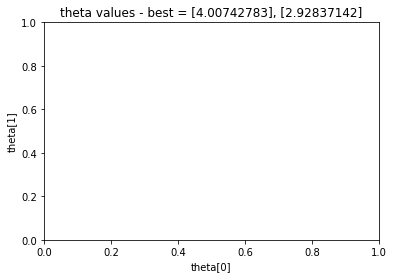

In [31]:
grad_best_theta, grad_all_thetas = gradient_desc(X_b, y, eta=0.1, verbose = True, n_iter=1000)

we see that our coefficients converge to 4, 3. This gives the same solution as LLS

## Stocastic Gradient Decsent

In [ ]:
def stoc_desc(X_b,
                  y,
                  t0 = 5,
                  t1 =50,
                  n_iter = 100,
                  verbose = False,
                  shuffle = False
                 ):
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # number of observations
    n_obs = X_b.shape[0] 
    #initial theta guess
    
    theta = np.random.randn(2,1)
    thetas = theta
    
    if verbose:
        print(f"Initial guess:{theta}")
        
    for epoch, i in it.product(range(n_iter), range(n_obs)):
        
        if shuffle:
            np.random.shuffle(X_b)
            
        rand_ind = np.random.randint(n_obs)
        xi = X_b[rand_ind:rand_ind+1]
        yi = y[rand_ind:rand_ind+1]
        
        grads = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n_obs + i)
        
        theta = theta - eta * grads
        thetas = np.hstack((thetas, theta))
        if verbose:
            print(f"step: {epoch}-{i} theta:{theta}\ngradient{grads}")
        
    if verbose:
        plt.title(f"theta values - best = {theta[0]}, {theta[1]}")
        plt.xlabel("theta[0]")
        plt.ylabel("theta[1]")
        plt.plot(all_thetas[0],all_thetas[1], "b-o")
    return theta, thetas

In [ ]:
stoc_best_theta, stoc_all_thetas = stoc_desc(X_b, y, verbose = True)

not quite as good as gradient desecnt for this problem, but as the jumps are less regular, this would work better with a noiser search space

Sklearn implementation

In [38]:
from sklearn.linear_model import SGDRegressor
mdl = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
mdl.fit(X,y.ravel())
print(f"intercept:{mdl.intercept_}\ngradient:{mdl.coef_}")


intercept:[4.12338964]
gradient:[3.03742973]


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


pretty good, and better than the estimates with our homemade function! So sklearn is doing something different/better

## Mini Batch gradient decent

In [ ]:
def mini_b_desc(X_b,
                  y,
                  t0 = 5,
                  t1 =50,
                  batch = 20,
                  n_iter = 100,
                  verbose = False,
                  shuffle = False
                 ):
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # number of observations
    n_obs = X_b.shape[0] 
    #initial theta guess
    
    theta = np.random.randn(2,1)
    thetas = theta
    
    if verbose:
        print(f"Initial guess:{theta}")
        
    for epoch, i in it.product(range(n_iter), range(0,n_obs,batch)):
        
        # shuffle X_b
        shuffle_ind = np.random.permutation(n_obs)
        X_b_shuffled = X_b[shuffle_ind]
        y_shuffled = y[shuffle_ind]
        
        xi = X_b_shuffled[i:i+batch]
        yi = y_shuffled[i:i+batch]
        
        grads = 2/batch * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n_obs + i)
        
        theta = theta - eta * grads
        thetas = np.hstack((thetas, theta))
        if verbose:
            print(f"step: {epoch}-{i} theta:{theta}\ngradient{grads}")
        
    if verbose:
        plt.title(f"theta values - best = {theta[0]}, {theta[1]}")
        plt.xlabel("theta[0]")
        plt.ylabel("theta[1]")
        plt.plot(all_thetas[0],all_thetas[1], "b-o")
    return theta, thetas

In [ ]:
mini_b_best_theta, mini_b_all_thetas = mini_b_desc(X_b, y, verbose = True)

## Comparison

In [ ]:
stoc_all_thetas[0,:]

In [ ]:
plt.plot(stoc_all_thetas[0,:], stoc_all_thetas[1,:], "r-s", linewidth=1, label="Stochastic")
plt.plot(mini_b_all_thetas[0,:], mini_b_all_thetas[1,:], "g-+", linewidth=2, label="Mini-batch")
plt.plot(grad_all_thetas[0,:], grad_all_thetas[1,:], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

as we see, stochastic is off its tits, while the other two converge in a smoother path toward the coefficents

## Polynomical regression

truth for these data

$$y=\frac{1}{2}X^2+X+2+\varepsilon$$



In [ ]:
n_obs = 100

X = 6 * np.random.rand(n_obs, 1)-3

y = 0.5 * X**2 + X + 2 + np.random.randn(n_obs, 1)

In [ ]:
plt.scatter(X,y)

use sklearns' polyfit to give a curve

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
ply_feat = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_ply = ply_feat.fit_transform(X)

In [ ]:
mdl = LinearRegression()

mdl.fit(X_ply, y)

print(f"intercept:{mdl.intercept_}\ncoefficents{mdl.coef_}")

this gives us a model of

$$y= 0.522X^2+0.936X+1.926+\varepsilon$$

compared to an original model of

$$y=0.5X^2+1.0X+2+\varepsilon$$

pretty good fit

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = ply_feat.transform(X_new)
y_new = mdl.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

## learning curves

In [ ]:
from sklearn.model_selection import KFold
from yellowbrick.model_selection import LearningCurve

rebuild the linear data

In [ ]:
sizes = np.linspace(0.1,1,50)

LearningCurve(LinearRegression(), 
              train_sizes=sizes,
             scoring='neg_mean_squared_error'
             ).fit(X,y).poof()

not that good a fit for our curve, lets try with polynomial regression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ply_reg = Pipeline([("ply_feat", PolynomialFeatures(degree=2, include_bias=False)),
                    ("lin_reg", LinearRegression()),
                    ])

In [ ]:
LearningCurve(ply_reg,
              train_sizes=sizes,
              scoring='neg_mean_squared_error'
             ).fit(X,y).poof()

A very good fit to the data

## Bias variance tradeoff

There are three sources of error in models.

#### Bias
    -Error due to incorrect assumptions about the data, e.g assuming the data is linear when it is not. High bias model underfits the data
 
#### Variance
    -Due to excessive sensitivity in the data. A model with many features - too many degrees of freedom is likey to have high varience. High varieance models overfit data
    
#### Irreducible error
    -due to noise in the data. Generally means that the features are not good predictors of the target variable, so more feature engineering or (worse) data collection is needed.
    
Increasing model complexity will typically increase varience and reduce bias. Hence a tradeoff

## Regularisation

It is important to scale data when applying (most) regularisation methods as it is sensitive to input features.

### Ridge regression

The hyperparameter $\alpha$ controls how strictly the model is regularised. If $\alpha$ is to high, the model parameters all end up close to zero. If it is too low, the model is not regularised enough and overfits.



$$J(\theta)= MSE(\theta)+\alpha \frac{1}{2}\sum_{i=1}^n\theta^2_{i=1}$$

note $\theta_0$ is not regularised as this is the bias term

The closed form of the euqation is as follows

$$\hat{\theta} = (X^TX+\alpha A)^{-1}X^Ty$$

In [32]:
from sklearn.linear_model import Ridge

X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

ridge_mdl = Ridge(alpha=1, solver="cholesky")
ridge_mdl.fit(X,y)

print(f"Ridge model\nintercept:{ridge_mdl.intercept_}\ngradient{ridge_mdl.coef_}")

Ridge model
intercept:[4.08666859]
gradient[[2.99857649]]


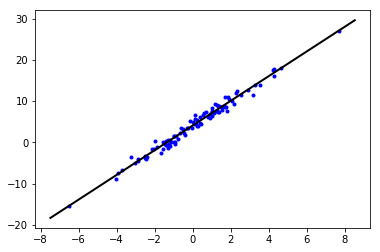

In [33]:
plt.plot(X, y, "b.")
plt.plot(np.arange(X.min()-1,X.max()+1),
         ridge_mdl.predict(np.arange(X.min()-1,X.max()+1).reshape(-1,1)),
         "k",
         linewidth=2,
         label="Predictions")

In [34]:
X.shape

(100, 1)

In [35]:
y[:,0].shape

(100,)

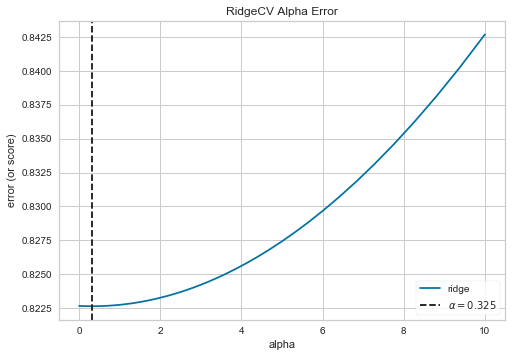

In [36]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y[:,0])
g = visualizer.poof()

We can use the ridge (L2) penalty for stochastic gradient descent too

In [40]:
sgd_mdl = SGDRegressor(penalty="l2", max_iter=100)
sgd_mdl.fit(X, y.ravel())

print(f"SGD Ridge model\nintercept:{sgd_mdl.intercept_}\ngradient{sgd_mdl.coef_}")

SGD Ridge model
intercept:[4.08511751]
gradient[3.00294475]


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


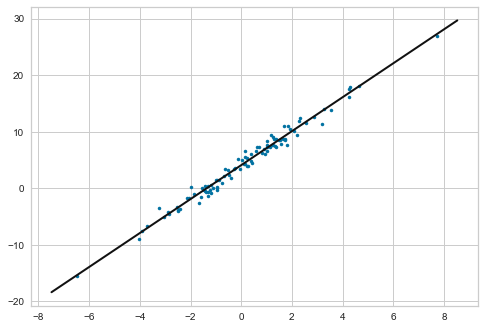

In [41]:
plt.plot(X, y, "b.")
plt.plot(np.arange(X.min()-1,X.max()+1),
         sgd_mdl.predict(np.arange(X.min()-1,X.max()+1).reshape(-1,1)),
         "k",
         linewidth=2,
         label="Predictions")

Very similar

## lasso

lasso uses the weight vector of the coefficents rather than the sum squared of the coefficients. 

$$J(\theta)= MSE(\theta)+\alpha\sum_{i=1}^n|\theta_{i}|$$

In [42]:
from sklearn.linear_model import Lasso

lasso_mdl = Lasso(alpha=1)
lasso_mdl.fit(X,y)

print(f"Lasso model\nintercept:{lasso_mdl.intercept_}\ngradient{lasso_mdl.coef_}")

Lasso model
intercept:[4.11164379]
gradient[2.78381398]


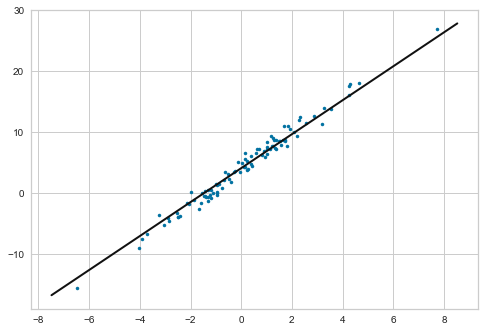

In [43]:
plt.plot(X, y, "b.")
plt.plot(np.arange(X.min()-1,X.max()+1),
         lasso_mdl.predict(np.arange(X.min()-1,X.max()+1).reshape(-1,1)),
         "k",
         linewidth=2,
         label="Predictions")

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


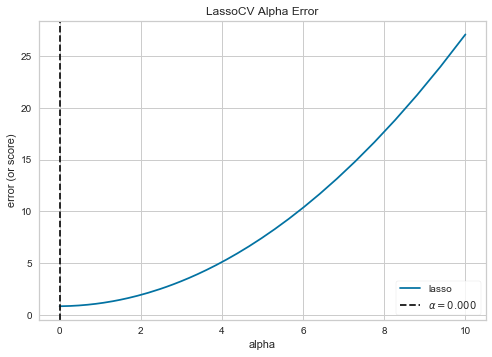

In [44]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y[:,0])
g = visualizer.poof()

In [45]:
sgd_mdl = SGDRegressor(penalty="l1", max_iter=100)
sgd_mdl.fit(X, y.ravel())

print(f"SGD Lasso model\nintercept:{sgd_mdl.intercept_}\ngradient{sgd_mdl.coef_}")

SGD Lasso model
intercept:[4.08500676]
gradient[3.00443667]


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


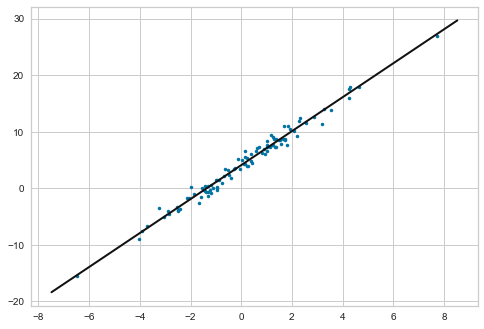

In [46]:
plt.plot(X, y, "b.")
plt.plot(np.arange(X.min()-1,X.max()+1),
         sgd_mdl.predict(np.arange(X.min()-1,X.max()+1).reshape(-1,1)),
         "k",
         linewidth=2,
         label="Predictions")

## Combining ridge and lasso with elasticnet

Gives a mix of ridge and lasso, controled by the mix ratio r. r is given a value between 0 and 1. Where r=0 elasticnet is equivalent to ridge, where r=1 elasticnet is equivilent to lasso.

$$J(\theta)= MSE(\theta)+r\alpha\sum_{i=1}^n|\theta_{i}|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta^2$$

### when to use what

- ridge
A good default, especially if you do not know which features are important
- lasso 
Good if you suspect only a few features are actually useful. Erratic with correlated features though.
- ElasticNet 
probably better than lasso with correlated features as lasso, also better when number of features > observations


In [47]:
from sklearn.linear_model import ElasticNet
en_mdl = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_mdl.fit(X,y)

print(f"ElasticNet model\nintercept:{en_mdl.intercept_}\ngradient{en_mdl.coef_}")

ElasticNet model
intercept:[4.09099625]
gradient[2.96136281]


In [48]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Elastic Net with 0.0 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_mod

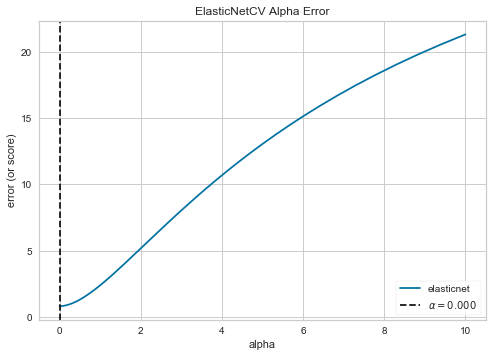

Elastic Net with 0.1 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


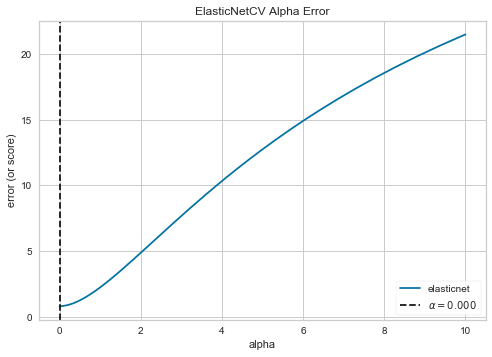

Elastic Net with 0.2 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


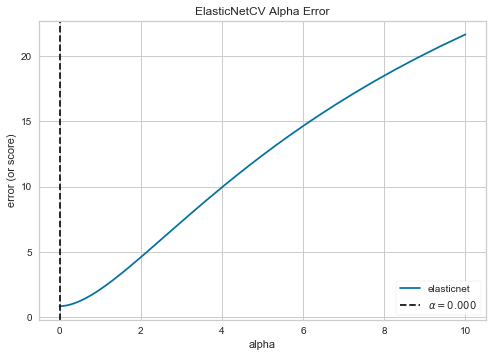

Elastic Net with 0.30000000000000004 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


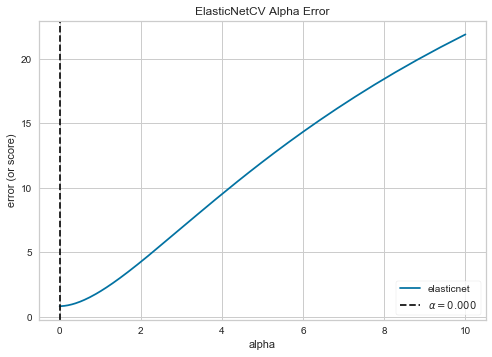

Elastic Net with 0.4 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


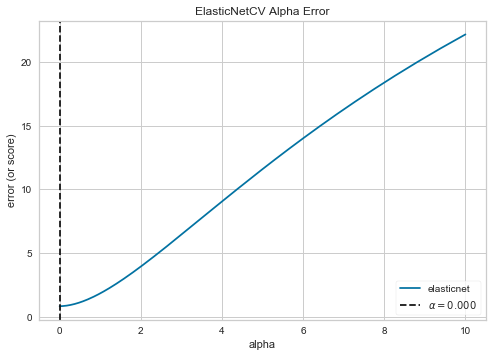

Elastic Net with 0.5 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


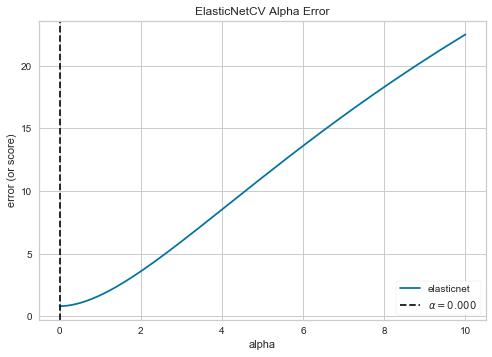

Elastic Net with 0.6000000000000001 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


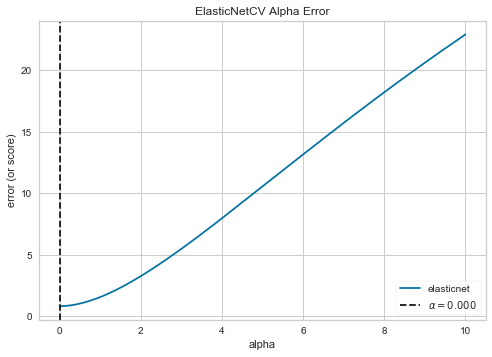

Elastic Net with 0.7000000000000001 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


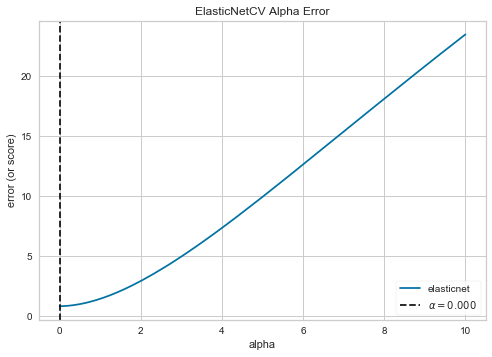

Elastic Net with 0.8 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


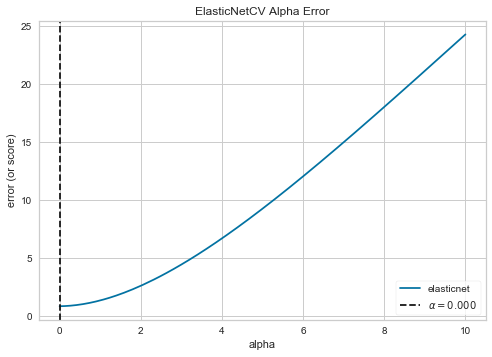

Elastic Net with 0.9 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


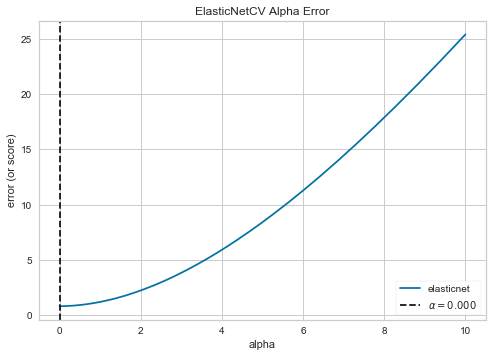

Elastic Net with 1.0 l1 ratio


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


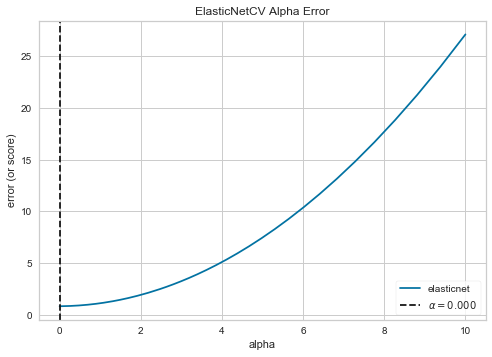

In [50]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import ElasticNetCV

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)
rs = np.arange(0,1.1,0.1)

for r in rs:
    print(f"Elastic Net with {r} l1 ratio")
    # Instantiate the linear model and visualizer
    model = ElasticNetCV(alphas=alphas, l1_ratio=r)
    visualizer = AlphaSelection(model)

    visualizer.fit(X, y[:,0])
    g = visualizer.poof()

In [62]:
sgd_mdl = SGDRegressor(penalty="elasticnet", max_iter=100)
sgd_mdl.fit(X, y.ravel())

print(f"SGD Lasso model\nintercept:{sgd_mdl.intercept_}\ngradient{sgd_mdl.coef_}")

SGD Lasso model
intercept:[4.08623281]
gradient[3.00525633]


/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


## Early stopping and gradient descent

In gradient descent algorithms, the validation error can start to creep up with further epochs. At this point the model is overfitting so there is no need to keep going. Instead we stop the process at this point.

The only thing to remember is that sometimes, curves are not smooth due to noise or multi-modal search space. To get over this, one method is to only stop when validation error has been above the minimum for some time.

In [76]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [61]:
# data prep
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()) ])

X_train_poly = poly_scaler.fit_transform(X_train)
X_test_poly = poly_scaler.fit_transform(X_test)


In [63]:
sgd_mdl = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005)

In [73]:
def stopping(mdl, X_train, X_test, y_train, y_test):
    
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    errors = []
    for epoch in range(1000):
        mdl.fit(X_train, y_train)  # continues where it left off
        y_val_predict = mdl.predict(X_test)
        errors.append(mean_squared_error(y_test, y_test))
        
        if errors[-1] < minimum_val_error:
            minimum_val_error = errors[-1]
            best_epoch = epoch
            best_mdl = clone(mdl)
    
    return errors, best_mdl, best_epoch

In [77]:
stopping(sgd_mdl, 
         X_train_poly,
         X_test_poly,
         y_train,
         y_test)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-package

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-package

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-package

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

## Logistic models



Binary classifier - predicts probability of an observation being in the postive  class.

Probability computed by weigthed sum of features

$$\hat{p}=h_\theta = \sigma(\theta^Tx)$$

Where 

$$\sigma(t)= \frac{1}{1+e^{-t}}$$

so...

$$\hat{p}=\frac{1}{1+e^{-(\theta^Tx)}}$$

for classification

$$\hat{y} = \begin{cases} 0 \text{ if } \hat{p} >= 0.5\\
                          1 \text{ if } \hat{p} <  0.5\end{cases}$$

## training and cost function

$$c(\theta) = \begin{cases} -log(\hat{p}) \text{if } y = 1\\
                          -log(1 - \hat{p}) \text{ if } y = 0\end{cases}$$

Why this, lets see what happens....

In [3]:
p_hat = np.arange(0,1,0.001)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


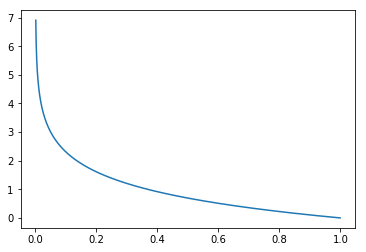

In [5]:
plt.plot(p_hat,-np.log(p_hat))

above is the cost function if y=1. we can see that the further the predicited probability is from 0, the greater the cost is. Makes sense

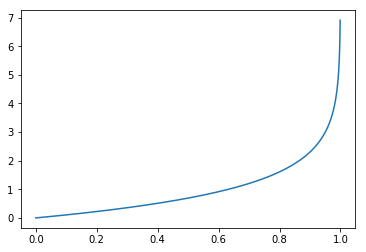

In [14]:
plt.plot(p_hat,-np.log(1-p_hat))

for y=0 the opposite is true, the closer something gets to 1, the higher the cost. Agian, makes sense.

from this we average the cost over the entire training set to derive the log-loss

$$J(\theta)=\frac{1}{m}\displaystyle\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+
(1-y^{(i)}) log(1-\hat{p}^{(i)})]$$

Unfortunatley, there is no known closed form equation to solve this, *but* the search space is convex.

Typically a gradient descent type process can find the global minimum with enough time and a sensible learning rate.

This also means stochastic gradient descent and mini-batch can be used

We try with the iris dataset

In [6]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()

In [8]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

grab data as our features and target as the class

In [9]:
X = iris["data"][:,3:] #petal with
y = (iris["target"]==2).astype(np.int) # iris-virginica or not iris-virginica as the class

In [10]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_mdl = LogisticRegression()

In [29]:
log_mdl.fit(X,y)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

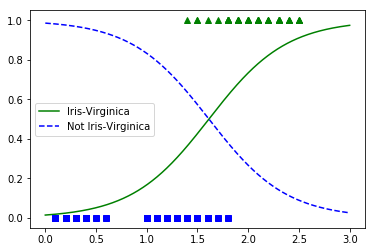

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_mdl.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.legend(loc="center left", fontsize=10)

seems like it is doing a pretty good job at discriminating the orchids by petal width

Note: logistic regression can be penalised with l1 or l2(default). However it uses C, the inverse of alpha for penalising the model, so higher C is a stronger penalty 

## softmax/multiclass logistic regression

Softmax regression is logisitic regression generalised for multiple classes without training multiple binary classifiers.

Softmax computes a score $s$ for each class $k$ for every observation $x$. Basically regression. 

$$s_k(x) = (\theta^k)^Tx$$

We take each score, compute the exponents and normalise. So the equation for classes K and observations x is...

$$\hat{p}_k = \sigma(s(x))_k = \frac{e(s_k(x))}{\sum_{k}^{j=1}e(s_j(x))}$$ 

we simply take the largest normalised softmax score value for this as our estimated class

$$\hat{y} = argmax(\sigma(s(x))_k)$$

To fit softmax, the aim is to minimise the cross-entropy function. This penalises models that give low probabilities for the target class.

$$J(\Theta)=-\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y^i_klog(\hat{p}^i_k)$$

$y^i_k$ is the target probability that observation i is in class k; usually 0 or 1. 

This is multiplied by $log(\hat{p}^i_k)$, this increase to infinity as it approaches 0. That means if $y^i_k$ is 1, y^i_klog(\hat{p}^i_k) gives a larger number the closer $log(\hat{p}^i_k)$ is to 0 and farther away from 1, the correct target. Thus a large penalty.

The rest is just summing over classes K ($\sum^K_{k=1}$) and averaging over all observations m ($-\frac{1}{m}\sum^m_{i=1}$).

For the search space, the gradient vector for the cross-entropy function is...

$$\nabla_{\theta^k}J(\Theta)=-\frac{1}{m}\sum^m_{i=1}(\hat{p}^i_k-y^i_k)x^i$$

So we take the average difference for the predicted - target probability, multiplied by the IV x.

In [38]:
from sklearn.model_selection import train_test_split

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

we set multi_class to 'multinomial' - this means we use softmax as opposed to one-verses all of logistic regression

we need to set the solver to "lbfgs" as the default doesn't work with multiclass problems.

In [39]:
soft_mdl = LogisticRegression(multi_class="multinomial",
                              solver="lbfgs",
                              C=10)

In [40]:
from yellowbrick.classifier import ROCAUC

In [41]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

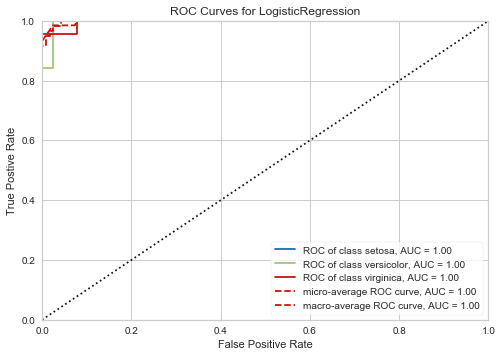

In [42]:
ROC = ROCAUC(soft_mdl, classes=iris["target_names"])

ROC.fit(X_train, y_train) 
ROC.score(X_test, y_test)
ROC.poof()

looks like a good fit